In [3]:
# Import standard packages
import numpy
import pandas as pd

In [4]:
#import geopandas
#import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt

In [5]:
# Import Data
db = pd.read_csv("/Users/ad/Documents/Exercises/_RgressionModeling/data/signage2015_kloof_seapoint.csv")
db.head()

,sign,Illuminated,Height,Width,Area,longitude,latitude,Suburb,illum
0,flatsgn,1,20.0,15.0,300.00,18.413518,-33.927335,Gardens,Yes
1,flatsgn,1,1.0,1.0,1.00,18.413378,-33.927435,Gardens,Yes
2,flatsgn,1,15.0,10.0,150.00,18.413138,-33.927596,Gardens,Yes
3,flatsgn,1,0.3,4.0,1.20,18.412546,-33.928151,Gardens,Yes
4,flatsgn,0,0.5,1.5,0.75,18.412608,-33.928158,Gardens,No


In [6]:
# https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#dispersion

from pyproj import CRS
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info


utm_crs_list = query_utm_crs_info(
    datum_name="WGS 84",
    area_of_interest=AreaOfInterest(
        west_lon_degree=18.413518,
        south_lat_degree=-33.927335,
        east_lon_degree=18.413518,
        north_lat_degree=-33.927335,
    ),
)
utm_crs = CRS.from_epsg(utm_crs_list[0].code)

In [7]:
from pyproj import Transformer
proj = Transformer.from_crs(utm_crs.geodetic_crs, utm_crs)

db['x_lat'], db['y_long'] = proj.transform(db['latitude'], db['longitude'])
db.head()

,sign,Illuminated,Height,Width,Area,longitude,latitude,Suburb,illum,x_lat,y_long
0,flatsgn,1,20.0,15.0,300.00,18.413518,-33.927335,Gardens,Yes,260909.919685,6.242888e+06
1,flatsgn,1,1.0,1.0,1.00,18.413378,-33.927435,Gardens,Yes,260897.328437,6.242876e+06
2,flatsgn,1,15.0,10.0,150.00,18.413138,-33.927596,Gardens,Yes,260875.508838,6.242858e+06
3,flatsgn,1,0.3,4.0,1.20,18.412546,-33.928151,Gardens,Yes,260822.401254,6.242795e+06
4,flatsgn,0,0.5,1.5,0.75,18.412608,-33.928158,Gardens,No,260828.099765,6.242794e+06


## Hex Binning

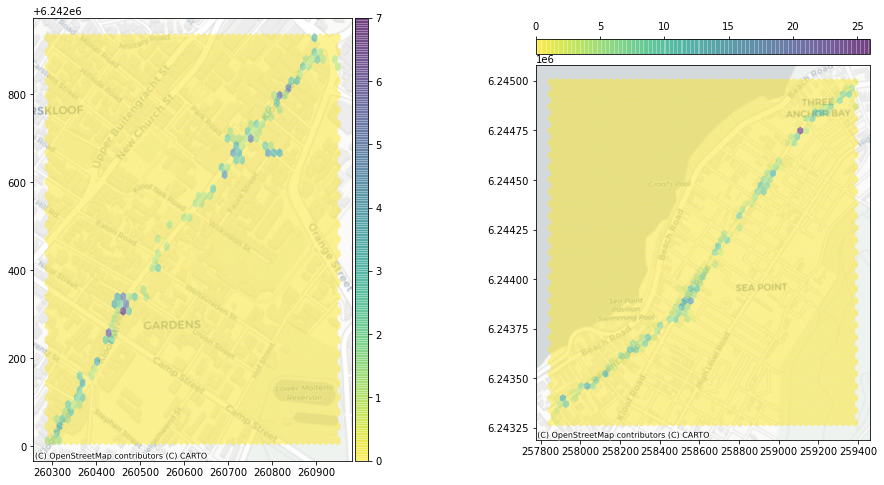

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Set up figure and axis
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
f.subplots_adjust(wspace=0.5)
x_gardens = db[db.Suburb == 'Gardens']['x_lat']
y_gardens = db[db.Suburb == 'Gardens']['y_long']
x_seapoint = db[db.Suburb == 'Seapoint']['x_lat']
y_seapoint = db[db.Suburb == 'Seapoint']['y_long']
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb0 = ax0.hexbin(
    x_gardens, 
    y_gardens,
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax0,
    zoom=16,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)
ax0_divider = make_axes_locatable(ax0)
# Add an axes to the right of the main axes.
cax0 = ax0_divider.append_axes("right", size="4%", pad="1%")
cb0 = f.colorbar(hb0, cax=cax0)
#ax0.title('Kloof Street - Gardens')

hb1 = ax1.hexbin(
    x_seapoint, 
    y_seapoint,
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax1,
    zoom=15,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)
ax1_divider = make_axes_locatable(ax1)
# Add an axes to the top of the main axes.
cax1 = ax1_divider.append_axes("top", size="4%", pad="3%")
cb1 = f.colorbar(hb1, cax=cax1, orientation="horizontal")
cax1.xaxis.set_ticks_position("top")
#ax1.title('Main Road - Seapoint')

plt.show()

The Hex-binning method shows a granulated sign concentration, noting that their dependence on bin width and -count potentialy discretise what might essentialy be a contiguous occurence. 

The above plots genereated by hex-binning indicate the spatial sign concetration, noting that near the intersections of Camp and Park Road there are relatively higher concentration of signs. For the Seapoint plot on the right there are 

NOTE: Adjust the `figsize` parameter to imporove readability.`

## Kernel Density Estimation (KDE)

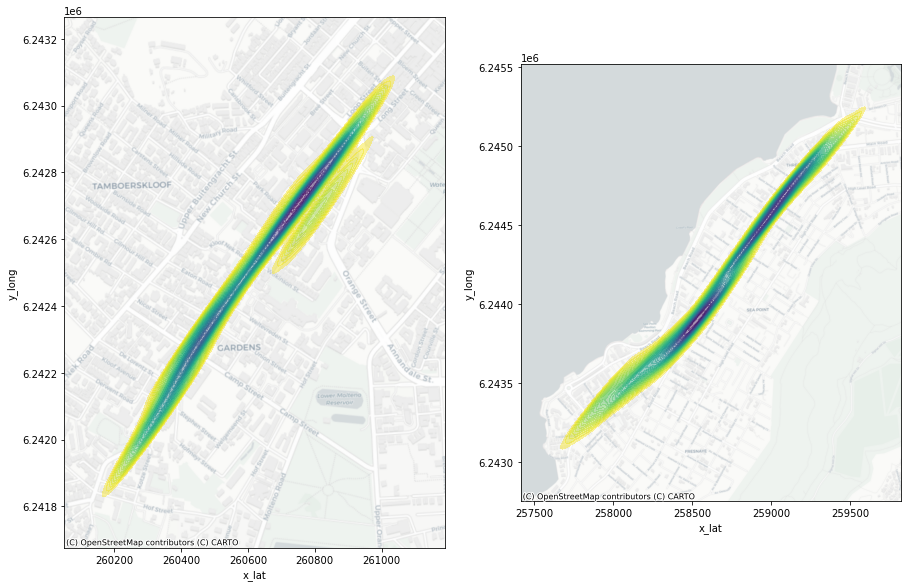

In [10]:
# Set up figure and axis
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
f.subplots_adjust(wspace=0.2)
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x = x_gardens, 
    y = y_gardens,
    n_levels=50, 
    shade=True,
    alpha=0.45, 
    cmap='viridis_r',
    ax=ax0
)
# Add basemap
contextily.add_basemap(
    ax0,
    zoom=16,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)

seaborn.kdeplot(
    x = x_seapoint, 
    y = y_seapoint,
    n_levels=50, 
    shade=True,
    alpha=0.45, 
    cmap='viridis_r',
    ax=ax1
)
# Add basemap
contextily.add_basemap(
    ax1,
    zoom=16,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
#ax.set_axis_off()

From the KDE we conclude a higher probability of encountering signs near the area where Park- and Camp- intersect Kloof Street. 

NOTE: Adjust the `figsize` parameter to scale plot for readability.

## Standard Deviation Elipse

/Users/ad/anaconda3/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


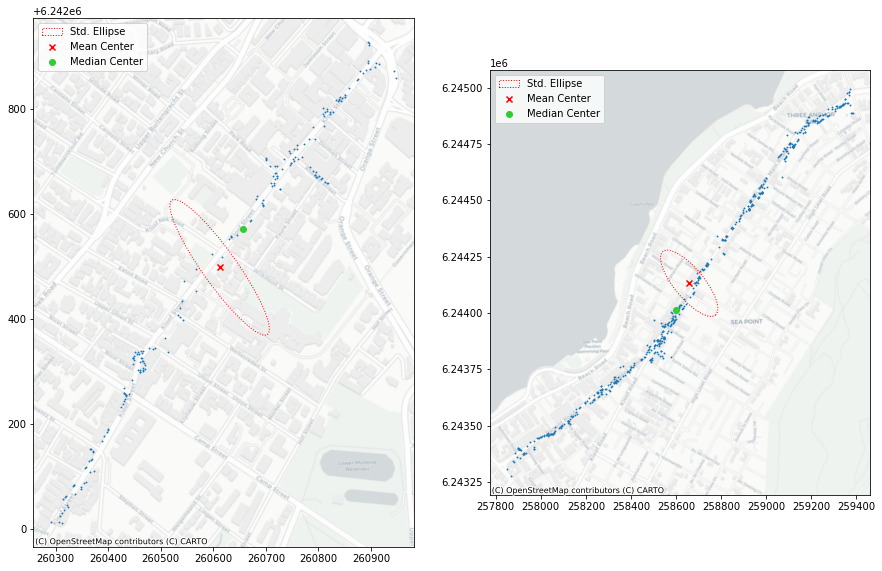

In [11]:
from pointpats import centrography

# Calculate mean- and median centre for Gardens
xy_gardens = db[db.Suburb == 'Gardens'][['x_lat', 'y_long']]
mean_center = centrography.mean_center(xy_gardens)
med_center = centrography.euclidean_median(xy_gardens)

major, minor, rotation = centrography.ellipse(xy_gardens)

from matplotlib.patches import Ellipse

# Set up figure and axis
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
# Plot photograph points
ax0.scatter(x_gardens, y_gardens, s=0.75)
ax0.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax0.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle=':',
                  label='Std. Ellipse')
ax0.add_patch(ellipse)

ax0.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax0,
    #zoom=15,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)

# Calculate mean- and median centre for Seapoint
xy_seapoint = db[db.Suburb == 'Seapoint'][['x_lat', 'y_long']]
mean_center = centrography.mean_center(xy_seapoint)
med_center = centrography.euclidean_median(xy_seapoint)

major, minor, rotation = centrography.ellipse(xy_seapoint)
# Plot photograph points
ax1.scatter(x_seapoint, y_seapoint, s=0.75)
ax1.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax1.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle=':',
                  label='Std. Ellipse')
ax1.add_patch(ellipse)

ax1.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax1,
    #zoom=15,
    crs='EPSG:32734',
    source=contextily.providers.CartoDB.Positron
)

plt.show()

In [14]:
print("Average Distance Away from the Point Cloud: {:.3f}m — Gardens, and {:.3f}m — Seapoint".format(
    centrography.std_distance(xy_gardens), 
    centrography.std_distance(xy_seapoint)))

Average Distance Away from the Point Cloud: 330.301m — Gardens, and 647.519m — Seapoint


This suggests that the average distance at which signs are located from the mean centre is 330 metres. 

# Randomness & clustering

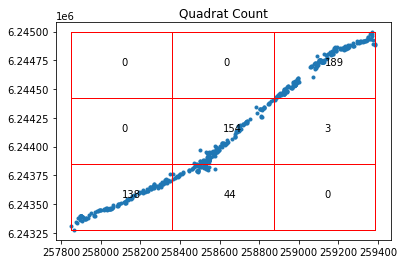

1.1648301913853331e-176

In [16]:
from pointpats import QStatistic

qstat = QStatistic(xy_seapoint.values)
qstat.plot()
print('Chi-square p-value: {:.3f}'.format(qstat.chi2_pvalue))

### $G$ function - event-to-event

The $G$ function is defined as follows: for a given distance $d$, $G(d)$ is the proportion of nearest neighbor distances that are less than $d$. $$G(d) = \sum_{i=1}^n \frac{ \phi_i^d}{n}$$
$$ \phi_i^d = \begin{cases} 1 & \quad \text{if } d_{min}(s_i)<d \\ 0 & \quad \text{otherwise } \\ \end{cases} $$

If the underlying point process is a CSR process, $G$ function has an expectation of: $$ G(d) = 1-e(-\lambda \pi d^2) $$ However, if the $G$ function plot is above the expectation this reflects clustering, while departures below expectation reflect dispersion.


REF: https://nbviewer.org/github/pysal/pointpats/blob/master/notebooks/distance_statistics.ipynb

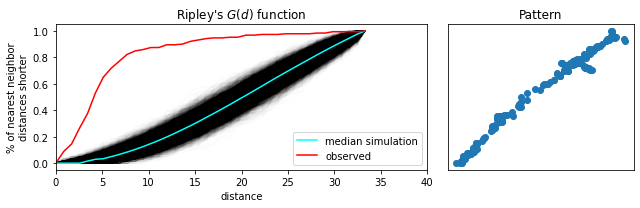

In [24]:
from pointpats import distance_statistics

g_test = distance_statistics.g_test(
    xy_gardens.values, support=40, keep_simulations=True
)

f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, numpy.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,35)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*xy_gardens.values.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

It is obvious that the above $G$ increases very slowly at small distances and the line is below the expected value for a CSR process (green line). We might think that the underlying spatial process is regular point process. However, this visual inspection is not enough for a final conclusion. In Simulation Envelopes, we are going to demonstrate how to simulate data under CSR many times and construct the $95\%$ simulation envelope for $G$.


### $F$ function - "point-event"

When the number of events in a point pattern is small, $G$ function is rough (see the $G$ function plot for the 12 size point pattern above). One way to get around this is to turn to $F$ funtion where a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point. The cumulative distribution of all nearest event neighbor distances is called $F$ function.

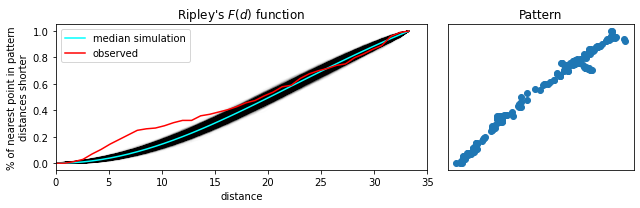

In [27]:
f_test = distance_statistics.f_test(
    xy_gardens.values, support=40, keep_simulations=True
)

f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,35)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*xy_gardens.values.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

In [34]:
from sklearn.cluster import DBSCAN

# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(xy_gardens)

DBSCAN()

In [33]:
clusterer.core_sample_indices_[:10]

array([], dtype=int64)

In [35]:
clusterer.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

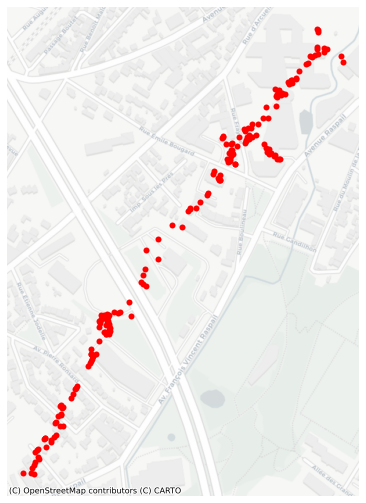

In [42]:
# Obtain the number of points 1% of the total represents
minp = numpy.round(xy_gardens.shape[0] * 0.01)

# Rerun DBSCAN
clusterer = DBSCAN(eps=500, min_samples=int(minp))
clusterer.fit(xy_gardens)
# Turn labels into a Series
lbls = pd.Series(clusterer.labels_, index=xy_gardens.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = xy_gardens.loc[lbls==-1, ['x_lat', 'y_long']]
# Plot noise in grey
ax.scatter(noise['x_lat'], noise['y_long'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db) and substract from
#      it the index of those that are noise
ax.scatter(
    xy_gardens.loc[xy_gardens.index.difference(noise.index), 'x_lat'],
    xy_gardens.loc[xy_gardens.index.difference(noise.index), 'y_long'],
    c='red', 
    linewidth=0
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

The first and most straightforward way to introduce space is by “spatially lagging” one of the explanatory variables. Mathematically, this can be expressed as follows: $ ln(P_i) = \alpha + \beta X_i + \delta \sum_j w_{ij} X'_i + \epsilon_i $ where $(\ln(P_i))$ is our dependent variable (logarithmic price), $(X'_i)$ is a subset of $(X_i)$, although it could encompass all of the explanatory variables, and $(w_{ij})$ is the $(ij)$-th cell of a spatial weights matrix $(W)$. 

Because $(W)$ assigns non-zero values only to spatial neighbors, if $(W)$ is row-standardized (customary in this context), then $(\sum_j w_{ij} X'_i)$ captures the average value of $(X'_i)$ in the surroundings of location $(i)$. This is what we call the spatial lag of $(X_i)$. Also, since it is a spatial transformation of an explanatory variable, the standard estimation approach -OLS- is sufficient: spatially lagging the variables does not violate any of the assumptions on which OLS relies

$(\beta_k)$ words inbetween $\phi_i^d$ 